In [16]:
import requests 
from bs4 import BeautifulSoup 
import json
import datetime
import pymongo

client = pymongo.MongoClient()
mydb = client["ethereum_news"]
mycol = mydb["News"]

def scrapenews():
    url = "https://www.newsnow.co.uk/h/Business+&+Finance/Cryptocurrencies/Ethereum+%28ETH%29?type=ln"
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser')
    #print(soup.prettify())
    #all_spans = soup.findAll('div',{'class':'mb-25 d-none d-md-block'})
    all_spans = soup.findAll('a',{'class':'hll'}) 
    time_news = soup.findAll('span',{'class':'time'})
    for h in all_spans:
        for t in time_news:
            mycol.insert_one({"datetime":t.get_text(),"news":h.text.strip()})


def main():
    scrapenews() 
main()

In [2]:
# Sentiment analysis 

import pymongo
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Database Name
database = client["ethereum_news"]
 
# Collection Name
column_name = database["News"]

In [7]:
data = column_name.find()

import pandas as pd

list_data = list(data)
#print(list_data)
df_news = pd.DataFrame(list_data)
print(df_news)

                          _id datetime  \
0    61c31d31b36c6ab511eb24ba    12:33   
1    61c31d31b36c6ab511eb24bb    12:33   
2    61c31d31b36c6ab511eb24bc    12:33   
3    61c31d31b36c6ab511eb24bd    12:33   
4    61c31d31b36c6ab511eb24be    12:33   
..                        ...      ...   
162  61c31d31b36c6ab511eb255c    12:33   
163  61c31d31b36c6ab511eb255d    12:33   
164  61c31d31b36c6ab511eb255e    12:33   
165  61c31d31b36c6ab511eb255f    12:33   
166  61c31d31b36c6ab511eb2560    12:33   

                                                  news  
0    Solana, Ethereum Classic, Decentraland Price A...  
1    Tokens.com Announces Additional Investment in ...  
2    Ethereum Reaches $5 Billion Burned Coin Mark S...  
3    Missed out on hot crypto stocks in 2021? It pa...  
4    StarkWare Unveils Ethereum Layer 3 ‘Hyper-Scal...  
..                                                 ...  
162  Self-isolation has been reduced to seven days ...  
163  Children across Afghanistan are in

In [8]:
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt


In [12]:
# Function for polarity
def get_polarity_news(text):
    return TextBlob(text).sentiment.polarity

df_news['Polarity'] = df_news['news'].apply(get_polarity_news)

df_news.head(5)

,_id,datetime,news,Polarity
0,61c31d31b36c6ab511eb24ba,12:33,"Solana, Ethereum Classic, Decentraland Price A...",0.166667
1,61c31d31b36c6ab511eb24bb,12:33,Tokens.com Announces Additional Investment in ...,0.000000
2,61c31d31b36c6ab511eb24bc,12:33,Ethereum Reaches $5 Billion Burned Coin Mark S...,0.000000
3,61c31d31b36c6ab511eb24bd,12:33,Missed out on hot crypto stocks in 2021? It pa...,0.250000
4,61c31d31b36c6ab511eb24be,12:33,StarkWare Unveils Ethereum Layer 3 ‘Hyper-Scal...,0.000000


In [13]:
def sentiment_score(score):
    if score < 0:
        return 'Negative'
    if score > 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_news['Sentiment_score'] = df_news['Polarity'].apply(sentiment_score)

df_news.head(5)

,_id,datetime,news,Polarity,Sentiment_score
0,61c31d31b36c6ab511eb24ba,12:33,"Solana, Ethereum Classic, Decentraland Price A...",0.166667,Neutral
1,61c31d31b36c6ab511eb24bb,12:33,Tokens.com Announces Additional Investment in ...,0.000000,Positive
2,61c31d31b36c6ab511eb24bc,12:33,Ethereum Reaches $5 Billion Burned Coin Mark S...,0.000000,Positive
3,61c31d31b36c6ab511eb24bd,12:33,Missed out on hot crypto stocks in 2021? It pa...,0.250000,Neutral
4,61c31d31b36c6ab511eb24be,12:33,StarkWare Unveils Ethereum Layer 3 ‘Hyper-Scal...,0.000000,Positive


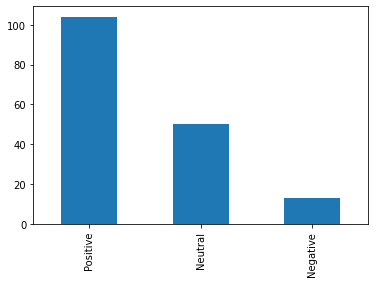

In [14]:
df_news['Sentiment_score'].value_counts().plot(kind='bar')
plt.show()